# Analisi delle recensioni - CLASSIFICATION

### Importo TEST e TRAINING Set

In [1]:
from google.colab import drive

drive.mount('/content/gdrive')

!ls "/content/gdrive/My Drive/Colab Notebooks/CLEAN_DATA_FOR_ANALYSIS"

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
ALL_DATA_TEST_SET.xlsx	    RISTORANTE_15.xlsx	RISTORANTE_3.xlsx
ALL_DATA_TRAINING_SET.xlsx  RISTORANTE_16.xlsx	RISTORANTE_4.xlsx
RISTORANTE_0.xlsx	    RISTORANTE_17.xlsx	RISTORANTE_5.xlsx
RISTORANTE_10.xlsx	    RISTORANTE_18.xlsx	RISTORANTE_6.xlsx
RISTORANTE_11.xlsx	    RISTORANTE_19.xlsx	RISTORANTE_7.xlsx
RISTORANTE_12.xlsx	    RISTORANTE_1.xlsx	RISTORANTE_8.xlsx
RISTORANTE_13.xlsx	    RISTORANTE_20.xlsx	RISTORANTE_9.xlsx
RISTORANTE_14.xlsx	    RISTORANTE_2.xlsx	TUTTI_I_RISTORANTI.xlsx


In [2]:
import pandas as pd

ALL_DATA_TEST_SET = pd.read_excel("/content/gdrive/My Drive/Colab Notebooks/CLEAN_DATA_FOR_ANALYSIS/ALL_DATA_TEST_SET.xlsx")
display(ALL_DATA_TEST_SET[:5])

print("\n")

ALL_DATA_TRAINING_SET = pd.read_excel("/content/gdrive/My Drive/Colab Notebooks/CLEAN_DATA_FOR_ANALYSIS/ALL_DATA_TRAINING_SET.xlsx")
display(ALL_DATA_TRAINING_SET[:5])

,Genere,Nomi,Recensioni,Scritta da,Voti,Index
1847,F,Paola,Chiediamo con cosa sono fritti per via di una ...,Mobile,1,1
2537,F,Francesca,Ho voluto provare i famosi panzerotti di Luini...,PC,1,3
2758,M,Fernando,"scortesia e maleducazione del servizio di ""sic...",PC,1,5
1344,F,Gerlanda,"Penso sia piu' la fama che il contenuto, non v...",Mobile,1,7
1092,M,Silvano,Piatti pessimi abbiamo ordinato sul menù un pr...,Mobile,1,9


,Genere,Nomi,Recensioni,Scritta da,Voti,Index
1088,M,Gennaro,"Pasto mediocre : pasta di pesce poco condita, ...",Mobile,1,2
8433,F,Elaine,La trappola finale turistiche! Il ristorante è...,PC,1,4
1081,F,Raffaella,Tempi di attesa lunghi ma sopratutto pizza cru...,Mobile,1,6
2766,F,Claudia,"e' tanto rinomato per i suoi panzerotti , ma a...",PC,1,8
8441,M,Giuseppe,Sono stato invitato in questo ristorante da mi...,Mobile,1,10


### Prima Analisi
Per questa prima analisi ci limiteremo ad utilizzare il testo delle recensioni, con una relativa etichetta che specifica se è positiva o meno (1 o 0).

In [3]:
# AGGIUNGO LA COLONNA CON 0/1 AI DATASET (valore iniziale arbirario)

ALL_DATA_TEST_SET['Sentiment'] = -99
display(ALL_DATA_TEST_SET[:5])

ALL_DATA_TRAINING_SET['Sentiment'] = -99
display(ALL_DATA_TRAINING_SET[:5])

,Genere,Nomi,Recensioni,Scritta da,Voti,Index,Sentiment
1847,F,Paola,Chiediamo con cosa sono fritti per via di una ...,Mobile,1,1,-99
2537,F,Francesca,Ho voluto provare i famosi panzerotti di Luini...,PC,1,3,-99
2758,M,Fernando,"scortesia e maleducazione del servizio di ""sic...",PC,1,5,-99
1344,F,Gerlanda,"Penso sia piu' la fama che il contenuto, non v...",Mobile,1,7,-99
1092,M,Silvano,Piatti pessimi abbiamo ordinato sul menù un pr...,Mobile,1,9,-99


,Genere,Nomi,Recensioni,Scritta da,Voti,Index,Sentiment
1088,M,Gennaro,"Pasto mediocre : pasta di pesce poco condita, ...",Mobile,1,2,-99
8433,F,Elaine,La trappola finale turistiche! Il ristorante è...,PC,1,4,-99
1081,F,Raffaella,Tempi di attesa lunghi ma sopratutto pizza cru...,Mobile,1,6,-99
2766,F,Claudia,"e' tanto rinomato per i suoi panzerotti , ma a...",PC,1,8,-99
8441,M,Giuseppe,Sono stato invitato in questo ristorante da mi...,Mobile,1,10,-99


In [4]:
# AGGIUNGO LA COLONNA CON 0/1 AI DATASET

ALL_DATA_TEST_SET.loc[ALL_DATA_TEST_SET.Voti >= 4, 'Sentiment'] = 1
ALL_DATA_TEST_SET.loc[ALL_DATA_TEST_SET.Voti < 4, 'Sentiment'] = 0

ALL_DATA_TRAINING_SET.loc[ALL_DATA_TRAINING_SET.Voti >= 4, 'Sentiment'] = 1
ALL_DATA_TRAINING_SET.loc[ALL_DATA_TRAINING_SET.Voti < 4, 'Sentiment'] = 0

display(ALL_DATA_TEST_SET[:5])
display(ALL_DATA_TEST_SET[4349:])
display(ALL_DATA_TRAINING_SET[:5])
display(ALL_DATA_TRAINING_SET[4348:])

,Genere,Nomi,Recensioni,Scritta da,Voti,Index,Sentiment
1847,F,Paola,Chiediamo con cosa sono fritti per via di una ...,Mobile,1,1,0
2537,F,Francesca,Ho voluto provare i famosi panzerotti di Luini...,PC,1,3,0
2758,M,Fernando,"scortesia e maleducazione del servizio di ""sic...",PC,1,5,0
1344,F,Gerlanda,"Penso sia piu' la fama che il contenuto, non v...",Mobile,1,7,0
1092,M,Silvano,Piatti pessimi abbiamo ordinato sul menù un pr...,Mobile,1,9,0


,Genere,Nomi,Recensioni,Scritta da,Voti,Index,Sentiment
3819,M,Elio,Il miglior spuntino della mia vita!! La schiac...,Mobile,5,8699,1
3817,F,Lucia,Ero un po' scoraggiata dalla fila ma era piutt...,Mobile,5,8701,1
3814,F,Lucia,Vale la pena fare la fila per la qualità della...,Mobile,5,8703,1
3811,M,Cosimo,Da fiorentino vi dico che è tra i migliori luo...,Mobile,5,8705,1
4353,M,Gianni,Quando vengo a Firenze è una meta obbligata......,Mobile,5,8707,1


,Genere,Nomi,Recensioni,Scritta da,Voti,Index,Sentiment
1088,M,Gennaro,"Pasto mediocre : pasta di pesce poco condita, ...",Mobile,1,2,0
8433,F,Elaine,La trappola finale turistiche! Il ristorante è...,PC,1,4,0
1081,F,Raffaella,Tempi di attesa lunghi ma sopratutto pizza cru...,Mobile,1,6,0
2766,F,Claudia,"e' tanto rinomato per i suoi panzerotti , ma a...",PC,1,8,0
8441,M,Giuseppe,Sono stato invitato in questo ristorante da mi...,Mobile,1,10,0


,Genere,Nomi,Recensioni,Scritta da,Voti,Index,Sentiment
3820,M,Iacopo,schiacciata ottima farcita con prodotti di alt...,Mobile,5,8698,1
3818,M,Giuseppe,Sono stata a Firenze per soli tre giorni e pas...,Mobile,5,8700,1
3815,F,Rosaria,Panini super buoni! Ampia scelta! Vino buoniss...,Mobile,5,8702,1
3813,F,Federica,"Se vedi una Fila lunghissima, anzi due, allora...",Mobile,5,8704,1
3828,M,Salvatore,"Vasta scelta di condimenti dai salumi, ai form...",Mobile,5,8706,1


In [5]:
# TEST SET
text_test = ALL_DATA_TEST_SET['Recensioni'].values.astype('U')
y_test = ALL_DATA_TEST_SET['Sentiment'].values


# TRAINING SET

text_train = ALL_DATA_TRAINING_SET['Recensioni'].values.astype('U')
y_train = ALL_DATA_TRAINING_SET['Sentiment'].values


print("Prima review (text_train):")
display(text_train[0])

print("\nPrimo sentiment (y_train):")
display(y_train[0])

Prima review (text_train):


"Pasto mediocre : pasta di pesce poco condita, salmone secco e 2 pomodori con un filo d' olio e tanti piatti del menù non disponibili. Si chiude in bellezza con l'arroganza della cassiera. Unica nota positiva la simpatia delle cameriere."


Primo sentiment (y_train):


0

### Vocabolario e Bag of Words
Usiamo CountVectorizer

In [6]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer()

count.fit( text_train )                          # creo il vocabolario
X_train = count.transform( text_train )          # creo la bag of words

print("\nX_train:\n{}".format(repr(X_train)))    # stampo la forma della bag of words

print("\nVocabulary size: {}". format(len(count.vocabulary_)))


X_train:
<4353x10016 sparse matrix of type '<class 'numpy.int64'>'
	with 133420 stored elements in Compressed Sparse Row format>

Vocabulary size: 10016


In [7]:
# Vediamo qualche dettaglio riguardo il dizionario
feature_names = count.get_feature_names()

print("Number of features: {}".format(len(feature_names)))

print("\nFirst 20 features:\n{}".format(feature_names[:20]))

print("\nEvery 2000th feature:\n{}".format(feature_names[::2000]))

Number of features: 10016

First 20 features:
['00', '000', '00più', '055', '10', '100', '1000', '10000', '1000ml', '100mt', '11', '110', '11am', '12', '120', '1230', '1253', '13', '135', '14']

Every 2000th feature:
['00', 'comporlo', 'globale', 'pallino', 'scioccata', 'zeppa']


### Logistic Regression
Abbiamo le etichette di allenamento memorizzate in <samp>y_train</samp> e la rappresentazione bag-of-words dei dati di allenamento in <samp>X_train</samp>, quindi possiamo addestrare un classificatore su questi dati.

In [8]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

# Usiamo la funzione fit(X,y) della LogisticRegression() per addestrare il nostro modello
# --> X è l'array contenente i dati di training
# --> y è l'etichetta del "sentiment" (positivo o negativo)

logreg.fit(X_train, y_train)


# Rappresentazione "Bag of word" del set di test
X_test = count.transform(text_test)

# Uso la funzione score(X,y) della LogisticRegression() per valutare la performance sul set di TRAINING e di TEST 
print("Train score: {:.2f}".format(logreg.score(X_train, y_train)))
print("Test score: {:.2f}".format(logreg.score(X_test, y_test)))


# score per ogni elemento che riceve fa 2 cose:
# - la predizione ()
# - l'analisi dello score (vede se predizione e risultato coincidono)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Train score: 1.00
Test score: 0.93


### Riduciamo il possibile Overfitting
La LogisticRegression ha un parametro di regolarizzazione, C, che può essere modificato (tramite una strategia di ricerca della griglia) per ridurre l'effetto dell'overfitting.


In [9]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}

def grid_search(X_train, y_train, X_test, y_test, param_grid):
  
    grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)
    
    # Uso la funzione grid.fit(X,y) di GridSearchCV per selezionare i parametri ed addestrare il modello
    grid.fit(X_train, y_train) 
    
    # Eseguo il training dei 5 classificatori --> poi seleziono il migliore trovato!
    

    print("Best cross-validation score: {:.2f}".format(grid.best_score_))
    print("Best parameters: ", grid.best_params_)
    
    
    # Test on the Testing set

    # Uso la funzione score(X,y) di GridSearchCV per calcolare la performance sul set di TRAINING 
    print("Test score: {:.2f}".format(grid.score(X_test,y_test)))
    
    return grid
  
  

grid_search(X_train, y_train, X_test, y_test, param_grid)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Best cross-validation score: 0.91
Best parameters:  {'C': 1}
Test score: 0.93


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

Abbiamo ottenuto nuovamente una precisione del 93%; il modello, però, non fa overfitting.

### Rimozione parole poco importanti
Per pulire il vocabolario da "parole" prive di significato, possiamo utilizzare solo token che compaiono in almeno due documenti (o almeno cinque documenti, ecc). 

In [10]:
# Settiamo il minimo numero di documenti in cui un token(parola) deve apparire (usiamo min_df)
# Cotruiamo dizionario e bag of words

count = CountVectorizer(min_df=3).fit(text_train)
X_train = count.transform(text_train)


print("X_train with min_df: {}".format(repr(X_train)))

feature_names = count.get_feature_names()

print("\nNumber of features: {}".format(len(feature_names)))
print("\nFirst 50 features:\n{}\n".format(feature_names[:50]))

# Rappresentazione Bag of word del set di TEST
X_test = count.transform(text_test)


grid_search(X_train, y_train, X_test, y_test, param_grid)

X_train with min_df: <4353x3606 sparse matrix of type '<class 'numpy.int64'>'
	with 125664 stored elements in Compressed Sparse Row format>

Number of features: 3606

First 50 features:
['00', '10', '100', '1000', '11', '110', '12', '13', '14', '15', '16', '18', '19', '20', '200', '2015', '21', '22', '23', '24', '25', '30', '35', '40', '45', '50', '5euro', '60', '66', '6secondi', '70', '75', '80', '90', 'abbacchio', 'abbastanza', 'abbia', 'abbiamo', 'abbiano', 'abbiate', 'abbinamenti', 'abbinamento', 'abbinare', 'abbinato', 'abbondante', 'abbondantemente', 'abbondanti', 'abbondanza', 'abbordabili', 'abdi']



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Best cross-validation score: 0.91
Best parameters:  {'C': 1}
Test score: 0.93


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

La precisione della validazione è rimasta invariata. Purtroppo non abbiamo migliorato il nostro modello.

### Identifichiamo le parole con la stessa radice
Per il modello, distinguere una parola come "cibo" e "cibi" non fa altro che aumentare l'Overfitting.
Questo problema può essere superato rappresentando ogni parola usando il suo word stem, che implica l'identificazione di tutte le parole che hanno la stessa radice.

In [11]:
from nltk.stem.snowball import SnowballStemmer

stemmer = SnowballStemmer("italian")

def tokenizer_snowballStemmer(text):
    return [stemmer.stem(word) for word in text.split()]

print("Esempio:", tokenizer_snowballStemmer("cibo cibi cibarsi cibare mangiare"))

Esempio: ['cib', 'cib', 'cib', 'cib', 'mang']


In [12]:
# Classification with Tokenizer NLTK
nltk_count = CountVectorizer(tokenizer=tokenizer_snowballStemmer, min_df=3).fit(text_train)

# Calcolo la Bag of word representation del set di TRAINING
X_train_nltk = nltk_count.transform(text_train)

print("X_train_nltk: {}\n".format(X_train_nltk.shape))

# Calcolo la Bag of word representation del set di TEST
X_test_nltk = nltk_count.transform(text_test)

grid_search(X_train_nltk, y_train, X_test_nltk, y_test, param_grid)

X_train_nltk: (4353, 3804)



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Best cross-validation score: 0.91
Best parameters:  {'C': 1}
Test score: 0.92


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

Abbiamo perso l'1% di accuratezza, ma contrastiamo sicuramente l'overfitting.

### Rimozione delle StopWords
Sono quelle parole estremamente comuni in tutti i tipi di testi, che probabilmente non riportano informazioni utili.

In [13]:
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
stop = stopwords.words('italian')

[w for w in tokenizer_snowballStemmer("è bello stare qui a studiare") [-10:] if w not in stop]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['bell', 'star', 'qui', 'stud']

Usiamo infine questa nuova lista nel classificatore

In [14]:
# Classificazione con Tokenizer NLTK + Stop-words
nltk_count = CountVectorizer(tokenizer=tokenizer_snowballStemmer, stop_words=stop, min_df=3).fit(text_train)


# Calcolo la Bag of word representation del set di TRAINING
X_train_nltk = nltk_count.transform(text_train)

print("X_train_nltk: {}".format(X_train_nltk.shape))

# Calcolo la Bag of word representation del set di TEST
X_test_nltk = nltk_count.transform(text_test)


grid_search(X_train_nltk,y_train,X_test_nltk,y_test,param_grid)

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abbi', 'abbiam', 'avemm', 'avend', 'avess', 'avesser', 'avessim', 'avest', 'avet', 'avev', 'avevam', 'avra', 'avrann', 'avre', 'avrebb', 'avrebber', 'avrem', 'avremm', 'avrest', 'avret', 'avut', 'com', 'contr', 'ebber', 'eran', 'erav', 'eravam', 'essend', 'fac', 'facc', 'facess', 'facessim', 'facest', 'fann', 'far', 'fara', 'farann', 'fare', 'farebb', 'farebber', 'farem', 'farest', 'fec', 'fecer', 'foss', 'fosser', 'fossim', 'fost', 'fumm', 'fur', 'hann', 'lor', 'nostr', 'perc', 'qual', 'quant', 'quell', 'quest', 'sar', 'sara', 'sarann', 'sare', 'sarebb', 'sarebber', 'sarem', 'sarest', 'siam', 'sian', 'siat', 'siet', 'son', 'stand', 'stann', 'star', 'stara', 'starann', 'stare', 'starebb', 'starebber', 'starem', 'starest', 'stav', 'stavam', 'stemm', 'stess', 'stesser', 'stessim', 'stest', 'st

X_train_nltk: (4353, 3716)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Best cross-validation score: 0.91
Best parameters:  {'C': 0.1}
Test score: 0.91


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

# TF-IDF
L'intuizione di questo metodo è di dare un peso elevato a qualsiasi termine che appare spesso in un particolare documento, ma non in molti documenti nel corpus. 
Se una parola appare spesso in un particolare documento, ma non in molti documenti, è probabile che sia molto descrittiva del contenuto di quel documento.

<i>scikit-learn</i> implementa il metodo tf-idf in una classe <samp>TfidfVectorizer</samp>, che acquisisce i dati di testo e fa sia l'estrazione della feature bag-of-words che la trasformazione tf-idf. 

Il punteggio tf-idf per la parola $w$ nel documento $d$ come implementato nella classe <samp>TfidfVectorizer</samp> è dato da:

\begin{equation}
 tfidf(w,d) = tf * \left(\ln\left( \frac{N+1}{N_w+1}\right)+1\right)
\end{equation}

dove:
- $N$ è il numero di documenti nel set di allenamento
- $N_w$ è il numero di documenti nel set di addestramento in cui appare la parola $w$
- $tf$ (il termine frequenza) è il numero di volte che la parola $w$ appare nel documento della query $d$ (il documento che si desidera trasformare o codificare). 


La classe applica anche la normalizzazione L2 dopo aver calcolato la rappresentazione tf-idf; in altre parole, ridimensiona la rappresentazione di ogni documento in modo da avere una lunghezza euclidea (ciò significa semplicemente che ogni riga è divisa per la somma di voci quadrate). 
Ridimensionare in questo modo significa che la lunghezza di un documento (il numero di parole) non cambia la rappresentazione vettoriale.

NB: dobbiamo tenere presente che il ridimensionamento di tf-idf ha lo scopo di trovare parole che contraddistinguono i documenti, ma è una tecnica NON supervisionata.
Quindi, "importante" non si riferisce necessariamente all'etichetta "recensione positiva" e "recensione negativa" a cui siamo interessati.

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Costruisco il vocabolario e la bag of words TF-IDF
countTFIDF = TfidfVectorizer(min_df=3,tokenizer=tokenizer_snowballStemmer, stop_words=stop,).fit(text_train)

XTFIDF_train = countTFIDF.transform(text_train)
XTFIDF_test = countTFIDF.transform(text_test)

print("X_train:\n{}".format(repr(XTFIDF_train)))

grid = grid_search(XTFIDF_train, y_train, XTFIDF_test, y_test,param_grid)

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abbi', 'abbiam', 'avemm', 'avend', 'avess', 'avesser', 'avessim', 'avest', 'avet', 'avev', 'avevam', 'avra', 'avrann', 'avre', 'avrebb', 'avrebber', 'avrem', 'avremm', 'avrest', 'avret', 'avut', 'com', 'contr', 'ebber', 'eran', 'erav', 'eravam', 'essend', 'fac', 'facc', 'facess', 'facessim', 'facest', 'fann', 'far', 'fara', 'farann', 'fare', 'farebb', 'farebber', 'farem', 'farest', 'fec', 'fecer', 'foss', 'fosser', 'fossim', 'fost', 'fumm', 'fur', 'hann', 'lor', 'nostr', 'perc', 'qual', 'quant', 'quell', 'quest', 'sar', 'sara', 'sarann', 'sare', 'sarebb', 'sarebber', 'sarem', 'sarest', 'siam', 'sian', 'siat', 'siet', 'son', 'stand', 'stann', 'star', 'stara', 'starann', 'stare', 'starebb', 'starebber', 'starem', 'starest', 'stav', 'stavam', 'stemm', 'stess', 'stesser', 'stessim', 'stest', 'st

X_train:
<4353x3716 sparse matrix of type '<class 'numpy.float64'>'
	with 86715 stored elements in Compressed Sparse Row format>


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Best cross-validation score: 0.91
Best parameters:  {'C': 10}
Test score: 0.92


### Vediamo cosa ha appreso il nostro modello
Infine, esaminiamo un po' più in dettaglio ciò che il nostro modello di regressione logistica ha effettivamente appreso dai dati.

Il seguente grafico a barre mostra i coefficienti più grandi e più piccoli del modello di logistic regression.

Features wtih lowest idf:
['molt' 'son' 'ottim' 'quest' 'tutt' 'personal' 'mang' 'buon' 'prezz'
 'cib' 'serviz' 'stat' 'post' 'abbiam' 'consigl' 'panzerott' 'siam'
 'panin' 'qualit' 'local']


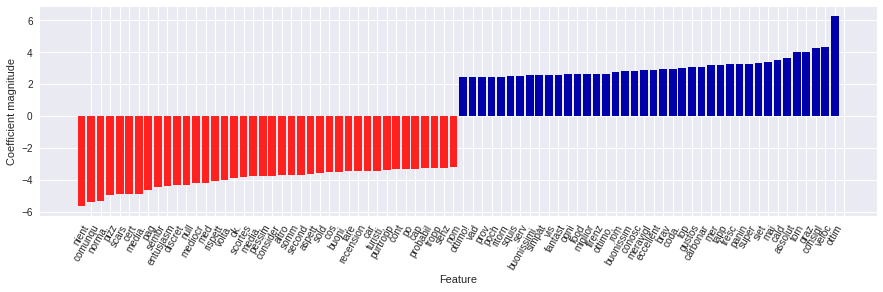

In [18]:
# Show coefficients
feature_names = np.array(countTFIDF.get_feature_names())
sorted_by_idf = np.argsort(countTFIDF.idf_)
print("Features wtih lowest idf:\n{}".format(feature_names[sorted_by_idf[:20]]))

# !pip install mglearn
import mglearn
import matplotlib.pyplot as plt
mglearn.tools.visualize_coefficients(
        grid.best_estimator_.coef_,
        feature_names, n_top_features=40)

plt.show()